Defina qual o tipo de distribuição do intervalo entre a chegada dos clientes (normal/exponencial): normal
Defina qual o tipo de distribuição do tempo de atendimento no caixa (normal/exponencial): normal
Defina o número de caixas: 4

Relógio marca agora: 0 segundos.
Tratando agora o evento = chegada de cliente
Programado evento de chegada de NOVO cliente aos 37.3 segundos
Programado NOVO evento de final de atendimento no caixa  0  aos 157.2 segundos
Tamanho da fila =  0
Tamanho da fila preferencial =  0
Caixas:  ['ocupado', 'livre', 'livre', 'livre']
Caixa preferencial:  ['livre']

Relógio marca agora: 37.3 segundos.
Tratando agora o evento = chegada de cliente
Programado evento de chegada de NOVO cliente aos 106.6 segundos
Programado NOVO evento de final de atendimento no caixa  1  aos 252.4 segundos
Tamanho da fila =  0
Tamanho da fila preferencial =  0
Caixas:  ['ocupado', 'ocupado', 'livre', 'livre']
Caixa preferencial:  ['livre']

Relógio marca agora: 106.6 segundos.
Tratando agora

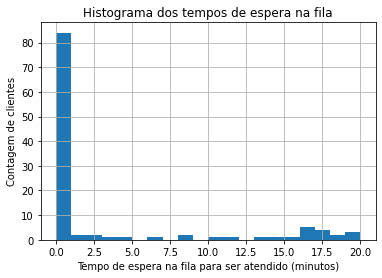

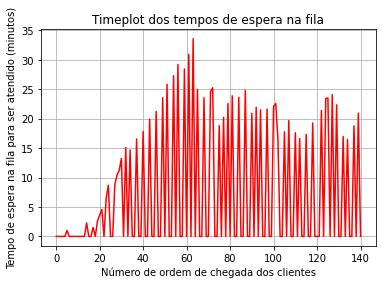

In [16]:
import random # biblioteca para geração de números aleatórios
random.seed(1) # define semente fixa para geração de números pseudo-aleatórios

# "magic funcion" para gráficos aparecerem aqui no Jupyter
%matplotlib inline 
from matplotlib import pyplot as plt  # biblioteca gráfica

# biblioteca para impressão colorida
from termcolor import colored

# Horário corrente (inteiro, em segundos) começa em zero.
# (instante 0 da simulação) 
horario = 0 

# A lista de eventos começa, de início, com um único evento: a chegada de um
# cliente. Este evento está programado para ocorrer no instante 0.
eventos = [-1]           # aqui marcamos o tipo do evento (-1 = chegada de um cliente)
horario_eventos = [0]    # aqui marcamos o instante programado para o evento.

# A fila de atendimento começa vazia (nenhum cliente esperando na fila). 
fila = []
fila_preferencial = []

# Não há registros de tempos de espera pelos clientes.
# Nenhum cliente foi devidamente atendido ainda.
tempos_espera = []    

# Definição dos tipos de distribuição e número de caixas
dist_tempo_cliente = input('Defina qual o tipo de distribuição do intervalo entre a chegada dos clientes (normal/exponencial): ')
while dist_tempo_cliente != 'normal' and dist_tempo_cliente != 'exponencial':
    dist_tempo_cliente = input('Defina qual o tipo de distribuição do intervalo entre a chegada dos clientes (normal/exponencial): ')

dist_tempo_atendimento = input('Defina qual o tipo de distribuição do tempo de atendimento no caixa (normal/exponencial): ')
while dist_tempo_atendimento != 'normal' and dist_tempo_atendimento != 'exponencial':
    dist_tempo_atendimento = input('Defina qual o tipo de distribuição do tempo de atendimento no caixa (normal/exponencial): ')

num_caixas = input('Defina o número de caixas: ')
while num_caixas.isnumeric() == False or int(num_caixas) < 0:
  num_caixas = input('Defina o número de caixas: ')
num_caixas = int(num_caixas)

# Aqui está o estado inicial dos postos de atendimento (caixas).
# Ao colocar aqui uma lista de 3 elementos, estamos dizendo que o banco tem 3 caixas.
# Para aumentar o número de caixas, basta aumentar esta lista. 
caixas = []
for i in range(0, num_caixas):
  caixas.append("livre")

caixa_preferencial = ['livre']

# Trata eventos programados durante as 3 primeiras horas (loop com uso do WHILE).
# No intante "3 horas", encerra a simulação. 
while horario < 60*60*3:  # 60 segundos * 60 minutos * 3 horas
 
    # Descobre qual o próximo evento a tratar na lista de eventos.
    # (-1 = chegada de cliente, 0, 1, 2... = término de# atendimento em um caixa). 
    # Para tanto procura em horario-eventos o horário mais próximo (o menor deles).
    # Apaga o evento e o horário do eventos das respectivas listas. 
    pos = horario_eventos.index(min(horario_eventos)) # index do próximo evento
    evento = eventos[pos]                             # obtém evento
    horario = horario_eventos[pos]                    # obtém horário do evento
    print(colored("\nRelógio marca agora: " + str(round(horario, 1)) + " segundos.", "magenta"))
    if evento == -1:
      idade_cliente = random.randint(15, 90)
      if idade_cliente > 60:
        e = "chegada de cliente preferencial"
      else:
        e = "chegada de cliente"
    else:
      if evento == -2:
        e = "término de atendimento no caixa preferencial"
      else:
        e = "término de atendimento no caixa " + str(evento)
    print("Tratando agora o evento = " + e)
    eventos.pop(pos)            # apaga o referido evento da lista de eventos
    horario_eventos.pop(pos)    # apaga horário do evento na lista dos horários   
                         
    # **** Tratamento do evento CHEGADA DE UM NOVO CLIENTE   *****
    if evento == -1:  

        # Programa a chegada de um próximo cliente após um tempo aleatório. 
        eventos.append(-1)
        if dist_tempo_cliente == "normal":
            h = horario + random.gauss(70, 20)
        else:
            h = horario + random.expovariate(1/70)
            # exponencial, especificando média = 70 seg 
        # Algumas outras possibilidades para determinar o horário de chegada do próximo cliente:
        # h = horario + random.gauss(mu,sigma)   # normal, especificando média e desvio-padrão
        # h = horario + random.expovariate(1/mu) # exponencial, especificando a média
        horario_eventos.append(h)
        print("Programado evento de chegada de NOVO cliente aos", round(h,1), "segundos")
    
        # Se há caixa livre, programa o evento do término do atendimento desse cliente
        # recém chegado neste caixa.
        # Se não há caixa livre, cliente vai para fila de espera. 
        if idade_cliente < 60: 
          if "livre" in caixas:            # verifica aqui se há caixa livre   
            i = caixas.index("livre")    # em havendo caixa livre, descobre qual caixa
            caixas[i] = "ocupado"        # o caixa passa a estar acupado agora
            eventos.append(i)            # gera evento do término do atendimento
            if dist_tempo_atendimento == 'normal':
                h = horario + random.gauss(180, 30)
            else:
                h = horario + random.expovariate(1/180)
            horario_eventos.append(h)    # registra o horário programado para o final desse atendimento
            tempos_espera.append(0)      # registra a espera deste cliente (0 seg, porque não ficou na fila!) 
            print("Programado NOVO evento de final de atendimento no caixa ", i, " aos", round(h,1), "segundos")
          else:
            fila.append(horario)          # estando todos os caixas ocupados, 
        else:
          if "livre" in caixa_preferencial:            # verifica aqui se há caixa livre   
            i = -2    # em havendo caixa livre, descobre qual caixa
            caixa_preferencial[0] = "ocupado"        # o caixa passa a estar acupado agora
            eventos.append(i)            # gera evento do término do atendimento
            if dist_tempo_atendimento == 'normal':
                h = horario + random.gauss(180, 30)
            else:
                h = horario + random.expovariate(1/180)
            horario_eventos.append(h)    # registra o horário programado para o final desse atendimento
            tempos_espera.append(0)      # registra a espera deste cliente (0 seg, porque não ficou na fila!) 
            print("Programado NOVO evento de final de atendimento no caixa preferencial aos", round(h,1), "segundos")
          else:
            fila_preferencial.append(horario)          # estando todos os caixas ocupados,          
                                         
    # **** Tratamento do evento Término do Atendimento de um Cliente no Caixa   *****
    if evento != -1:
      if evento == -2:
        i = -2
        if len(fila_preferencial) == 0:
          caixa_preferencial[0] = "livre"
        else:
          tempos_espera.append((horario-fila_preferencial[0])/60) # espera = agora - chegada
          del fila_preferencial[0]
          eventos.append(i)
          if dist_tempo_atendimento == 'normal':
            y = horario+random.gauss(180, 30)
          else:
            y = horario+random.expovariate(1/180)
          horario_eventos.append(y)
          print("Programado NOVO evento de final de atendimento no caixa preferencial aos", round(y, 1), "segundos")
      else:
        i = evento                # i passa a guardar o número do caixa que sendo liberado agora.
        if len(fila) == 0:        # Caixa foi liberado, mas não há cliente.
            caixas[i] = "livre"   # na fila --> muda status deste caixa para livre.
        else:
            # Havendo cliente na fila, registra quantos minutos ele esperou
            # para ser atendido e registra essa informação. 
            # Retira o cliente da fila. 
            # Programa o final do atendimento do novo cliente nesse caixa. 
            tempos_espera.append((horario-fila[0])/60) # espera = agora - chegada
            del fila[0]
            eventos.append(i)
            if dist_tempo_atendimento == 'normal':
                y = horario+random.gauss(180, 30)
            else:
                y = horario+random.expovariate(1/180)
            horario_eventos.append(y)
            print("Programado NOVO evento de final de atendimento no caixa ", i, " aos", round(y, 1), "segundos")


    # **** Ao final do tratamento do evento (qualquer que seja ele) *****
    print("Tamanho da fila = ", len(fila)) # imprime tamanho da fila
    print("Tamanho da fila preferencial = ", len(fila_preferencial))
    print("Caixas: " , caixas)             # imprime situação dos caixas
    print("Caixa preferencial: ", caixa_preferencial)

#  Terminado o período de simulação, imprimimos os resultados-resumo da simulação.
print()
print("**** Tempo máximo de espera na fila (minutos): ", round(max(tempos_espera), 1))
print("**** Tempo médio de espera na fila (minutos): ", round(sum(tempos_espera)/len(tempos_espera), 1))
print()
print()

# gera histograma dos tempos de espera na fila
plt.hist(tempos_espera, bins = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])
plt.title('Histograma dos tempos de espera na fila')
plt.xlabel("Tempo de espera na fila para ser atendido (minutos)")
plt.ylabel("Contagem de clientes")
plt.grid(True)
plt.show()

# gera line plot dos tempos de espera na fila
plt.plot(tempos_espera, color = "r")
plt.title('Timeplot dos tempos de espera na fila')
plt.xlabel("Número de ordem de chegada dos clientes")
plt.ylabel("Tempo de espera na fila para ser atendido (minutos)")
plt.grid(True)
plt.show()

Desafio:

1.   Deixe as distribuições (dos intervalos entre chegadas de clientes e dos tempos de atendimento no caixa) configuráveis pelo usuário. Deixe o número de caixas configurável pelo usuário.
2.   Crie uma caixa exclusive para terceira idade: sorteie uma idade para o cliente (20% de terceira idade, por exemplo).
3.   Deixe configurável se clientes não-idosos podem ou não usar o caixa de idosos se esta estiver vazia.

(use try e except para facilitar a definição dos prâmetros da simulação)








